In [13]:
import torch
import numpy as np

In [14]:
x = torch.empty(2,5)
print(x)

tensor([[5.6052e-45, 2.8026e-45, 8.7931e-42, 7.0065e-45, 1.1210e-44],
        [8.7931e-42, 8.4078e-45, 4.2039e-45, 8.7931e-42, 9.8091e-45]])


In [15]:
x = torch.rand(5, 3) # rand no. in [0,1]
print(x)

tensor([[0.2899, 0.5027, 0.7422],
        [0.9212, 0.2032, 0.4380],
        [0.0168, 0.1655, 0.4831],
        [0.0172, 0.5309, 0.7628],
        [0.6189, 0.7438, 0.9621]])


In [16]:
x = torch.ones(5, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [17]:
# check size
print(x.size(), x.shape, x[0].shape)

torch.Size([5, 3]) torch.Size([5, 3]) torch.Size([3])


In [18]:
# datatype
print(x.dtype)
x = torch.ones(3,2,dtype=int)
print(x)

torch.float32
tensor([[1, 1],
        [1, 1],
        [1, 1]])


In [19]:
# To calcualte gradient for this tensor
x = torch.tensor([2, 3.5, 4], requires_grad = True)
print(x)

tensor([2.0000, 3.5000, 4.0000], requires_grad=True)


In [20]:
# slicing
x = torch.rand(5,4)
print(x)
print(x[:, 0])

tensor([[7.1725e-01, 5.1789e-01, 8.0126e-01, 5.7438e-01],
        [3.1579e-01, 5.6966e-01, 4.5246e-01, 1.2233e-01],
        [2.1474e-01, 3.4550e-01, 9.8497e-01, 5.9773e-01],
        [8.6255e-01, 7.3570e-04, 6.1266e-01, 1.1736e-01],
        [4.1088e-01, 7.2335e-02, 6.4748e-01, 5.2650e-01]])
tensor([0.7173, 0.3158, 0.2147, 0.8625, 0.4109])


In [21]:
# reshape size
x = torch.randn(4, 4)
y = x.view(2, -1)
print(x, "\n", y)

tensor([[ 1.2001,  0.0541,  0.6976,  0.0771],
        [ 0.8368,  1.1789,  0.3856,  0.2079],
        [-0.6641,  1.1934, -0.7358,  1.5691],
        [-0.4029, -1.3785,  3.0569, -1.0775]]) 
 tensor([[ 1.2001,  0.0541,  0.6976,  0.0771,  0.8368,  1.1789,  0.3856,  0.2079],
        [-0.6641,  1.1934, -0.7358,  1.5691, -0.4029, -1.3785,  3.0569, -1.0775]])


In [22]:
# TENSOR --> NUMPY ARRAY
x = torch.ones(3,2)
y = x.numpy()
print(type(y))
print(x)
# *** If tensor is on GPU, then both tensor and np array will share 
#     same memory location, so changing one will change other too.

<class 'numpy.ndarray'>
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [23]:
x.add_(2)
print(x)
print(y)  # <=== Both changed !!

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])
[[3. 3.]
 [3. 3.]
 [3. 3.]]


In [24]:
#  NUMPY ARRAY --> TENSOR
a = np.ones(3)
b = torch.from_numpy(a)  # <-- Share same mem locations
c = torch.tensor(a) # <-- different memory
print(type(a), type(b), type(c))

<class 'numpy.ndarray'> <class 'torch.Tensor'> <class 'torch.Tensor'>


##  GPU Support
##### By default Tensor proccesses on CPU, but we can allocate GPU to all tensors 

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
x = torch.rand(2,3).to(device)  # tensor moved to GPU device

x = torch.rand(2,3, device=device) # created on GPU device only

cuda


## Autograd
##### this package give automatic differentiation for all ops on tensor.
##### It provides partial derivatives, while applying chain rule.
>Set requires_grad = True

In [26]:
x = torch.randn(5, requires_grad=True)

y = x + 2
z = y * y + 1
w = z.mean()

# All ops are tracked 
print(x)
print(y)
print(z)
print(w)

print(x.grad) 
w.backward() # <- backward propagation
print(x.grad) #dz/dx

# TO remove all gradient calcualted we use optimizer.zero_grad()

tensor([ 1.0768,  0.2739, -0.0209, -0.3778, -1.0820], requires_grad=True)
tensor([3.0768, 2.2739, 1.9791, 1.6222, 0.9180], grad_fn=<AddBackward0>)
tensor([10.4666,  6.1707,  4.9169,  3.6314,  1.8428], grad_fn=<AddBackward0>)
tensor(5.4057, grad_fn=<MeanBackward0>)
None
tensor([1.2307, 0.9096, 0.7916, 0.6489, 0.3672])


## Stop a tensor from tracking history:
##### For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:
- x.requires_grad_(False)
- x.detach()
- wrap in with torch.no_grad():

In [27]:
# 1
x = torch.randn(4,2)
y=x*x+3
print(y.grad_fn)

x.requires_grad_(True)
y=x*x+3
print(y.grad_fn)

None


In [28]:
# 2 : remove grad comp unit from tensor and create new tensor
x = torch.randn(2,2, requires_grad=True)
y = x.detach()
print(x.requires_grad)
print(y.requires_grad)

True
False


In [29]:
# 3
x = torch.randn(2, 2, requires_grad=True)
with torch.no_grad():
    y = x*x + x
    print(y.grad_fn)

None


## Linear Regression
> f(x) = w*x + b

In [30]:
# here, fx = 2*x
X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32,requires_grad=True)

# model
def forward(x):
    return w*x
def loss(y,y_):
    return ((y_-y)**2).mean()

X_test = -10
print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

# Training
mu = 0.01
epochs = 100

for epoch in range(epochs):
    Y_ = forward(X)
    L = loss(Y,Y_)
    
    L.backward()

    with torch.no_grad():
        w -= mu * w.grad
        # !! dont do w = w - mu*w.grad
        # It will create new w tensor, which will not be linked to any function history
        # hence no grad for it.

    w.grad.zero_()
    
    if(epoch+1) % 10 == 0:
        print("epoch:",epoch+1, " w:", w.item(), " loss:", L.item())

# test
print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(-10) = -0.000
epoch: 10  w: 1.9984041452407837  loss: 0.0002704716462176293
epoch: 20  w: 1.999998688697815  loss: 1.7278267705478356e-10
epoch: 30  w: 2.0  loss: 0.0
epoch: 40  w: 2.0  loss: 0.0
epoch: 50  w: 2.0  loss: 0.0
epoch: 60  w: 2.0  loss: 0.0
epoch: 70  w: 2.0  loss: 0.0
epoch: 80  w: 2.0  loss: 0.0
epoch: 90  w: 2.0  loss: 0.0
epoch: 100  w: 2.0  loss: 0.0
Prediction after training: f(-10) = -20.000


## Model, Loss & Optimizer

A typical PyTorch pipeline:
- Design model (input, output, fwd pass with diff layers)
- Construct loss and optimizers
- Training loop:
    - Forward: compute pred and loss
    - Backward: coputer grads
    - update weights

In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [33]:
# Hyper-parameteres
input_size = 784 #28*28
hidden_size = 500
num_classes = 10
num_epochs = 24
batch_size = 100
learning_rate = 0.001

In [34]:
# MNIST dataset 
df_train = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)

df_test = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(), download=True)
                                          

In [39]:
# Data loader : it helps in iterating over datasets
train_loader = torch.utils.data.DataLoader(dataset=df_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=df_test,batch_size=batch_size,shuffle=True)

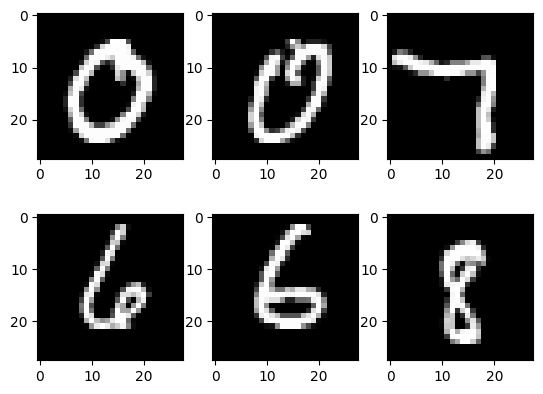

In [40]:
# example iterator
itr = iter(train_loader)
example_X, example_Y = next(itr) # it return next batch of data from dataset

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_X[i][0], cmap='gray')
plt.show()



In [37]:
# Fully Connected neural network

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l2(self.relu(self.l1(x)))
        # no activation or softmax as Op func 
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# Train model
total_steps = len(train_loader)
for epoch in range(num_epochs):
    # each iteration will give a batch of images 
    for i, (images, labels) in enumerate(train_loader): 
        # original shape : [100, 1, 28, 28]
        # now: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward prop
        outputs = model.forward(images)
        loss = loss_f(outputs, labels)

        # backward prop and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch [1/24], Step [100/600], Loss: 0.3421
Epoch [1/24], Step [200/600], Loss: 0.3937
Epoch [1/24], Step [300/600], Loss: 0.3156
Epoch [1/24], Step [400/600], Loss: 0.1090
Epoch [1/24], Step [500/600], Loss: 0.1196
Epoch [1/24], Step [600/600], Loss: 0.1786
Epoch [2/24], Step [100/600], Loss: 0.2041
Epoch [2/24], Step [200/600], Loss: 0.0444
Epoch [2/24], Step [300/600], Loss: 0.0691
Epoch [2/24], Step [400/600], Loss: 0.0642
Epoch [2/24], Step [500/600], Loss: 0.0740
Epoch [2/24], Step [600/600], Loss: 0.0576
Epoch [3/24], Step [100/600], Loss: 0.0816
Epoch [3/24], Step [200/600], Loss: 0.1146
Epoch [3/24], Step [300/600], Loss: 0.0923
Epoch [3/24], Step [400/600], Loss: 0.0561
Epoch [3/24], Step [500/600], Loss: 0.0602
Epoch [3/24], Step [600/600], Loss: 0.0450
Epoch [4/24], Step [100/600], Loss: 0.0445
Epoch [4/24], Step [200/600], Loss: 0.0270
Epoch [4/24], Step [300/600], Loss: 0.0776
Epoch [4/24], Step [400/600], Loss: 0.0493
Epoch [4/24], Step [500/600], Loss: 0.0631
Epoch [4/24

In [38]:
# Testing the model

with torch.no_grad():
    good_pred = 0
    total_samples = len(test_loader.dataset)
    
    for images,labels in (test_loader):
        # 1oo images per batch
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model.forward(images)
        _, prediction = torch.max(outputs, 1) # max give (output value, index)

        good_pred += (prediction==labels).sum().item()

    accuracy = good_pred/(total_samples)
    print(f'Accuracy of the network on the {total_samples} test images: {100 * accuracy} %')
        

Accuracy of the network on the 10000 test images: 98.37 %


4


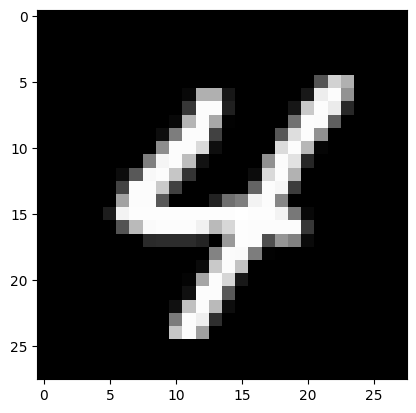

In [83]:
# test random
itr = iter(test_loader)

example_X, example_Y = next(itr) # it return next batch of data from dataset
# print(example_X.size())

plt.imshow(example_X[10][0], cmap='gray')

y = model.forward(example_X[10][0].reshape(-1,28*28).to(device)).to(device)
pred = torch.argmax(y)

print(pred.item())